<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.17.0-cp310-cp310-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp310-cp310-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp310-cp310-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.4.0-cp310-cp310-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
  Using c

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [24]:
len(X_train)

60000

In [25]:
len(X_test)

10000

In [26]:
X_train[0].shape

(28, 28)

In [27]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

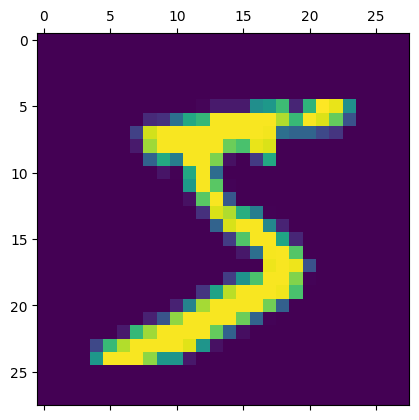

In [28]:
plt.matshow(X_train[0])

In [29]:
y_train[0]

5

In [30]:
X_train = X_train / 255
X_test = X_test / 255

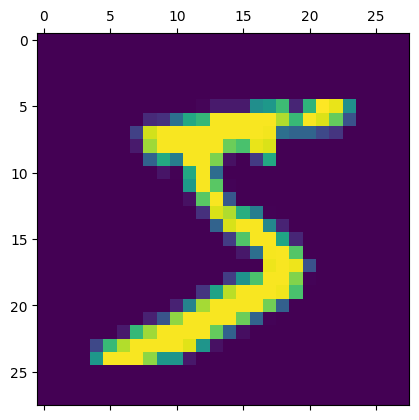

In [37]:
plt.matshow(X_train[0])

In [32]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [33]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [39]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4882 - loss: 2.2441
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6921 - loss: 2.0268
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.7328 - loss: 1.8354
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7571 - loss: 1.6645
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7738 - loss: 1.5181


In [40]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7735 - loss: 1.4578


[1.4040687084197998, 0.8015000224113464]

In [41]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step


array([0.31507468, 0.39566967, 0.3544336 , 0.4151977 , 0.4734361 ,
       0.3816726 , 0.29038936, 0.8126664 , 0.3734127 , 0.57955086],
      dtype=float32)

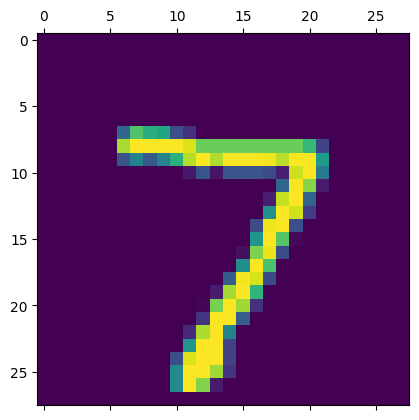

In [42]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [43]:
np.argmax(y_predicted[0])

7

In [44]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [46]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [47]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 924,    2,    5,   10,    0,    3,   30,    1,    5,    0],
       [   0, 1108,    8,    4,    0,    1,    4,    0,   10,    0],
       [  19,   79,  791,   34,   14,    0,   35,   23,   36,    1],
       [   6,   47,   27,  863,    1,    2,    5,   27,   24,    8],
       [   2,   47,    3,    0,  778,    0,   31,   13,    4,  104],
       [  37,  106,    4,  206,   29,  386,   28,   48,   23,   25],
       [  26,   47,    7,    0,   10,   10,  855,    2,    1,    0],
       [   2,   66,   12,    2,    7,    0,    3,  913,    7,   16],
       [  22,   89,   10,   98,   13,    7,   17,   31,  666,   21],
       [  23,   43,    5,   11,   70,    0,    1,  117,    8,  731]])>

Text(95.72222222222221, 0.5, 'Truth')

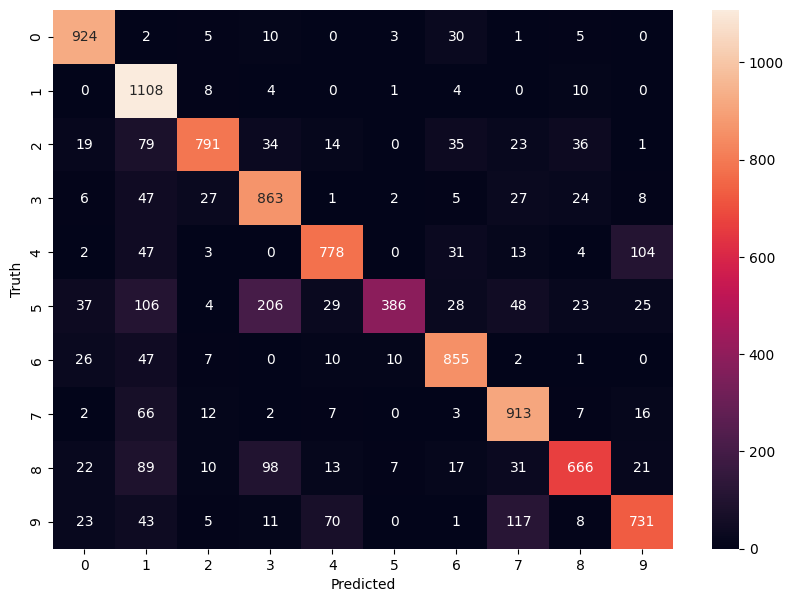

In [48]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [49]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=2)

C:\Users\BS462NK\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2638 - loss: 2.1780
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5454 - loss: 1.4905


In [50]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.6240 - loss: 1.2020


[1.1550086736679077, 0.6446999907493591]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step


Text(95.72222222222221, 0.5, 'Truth')

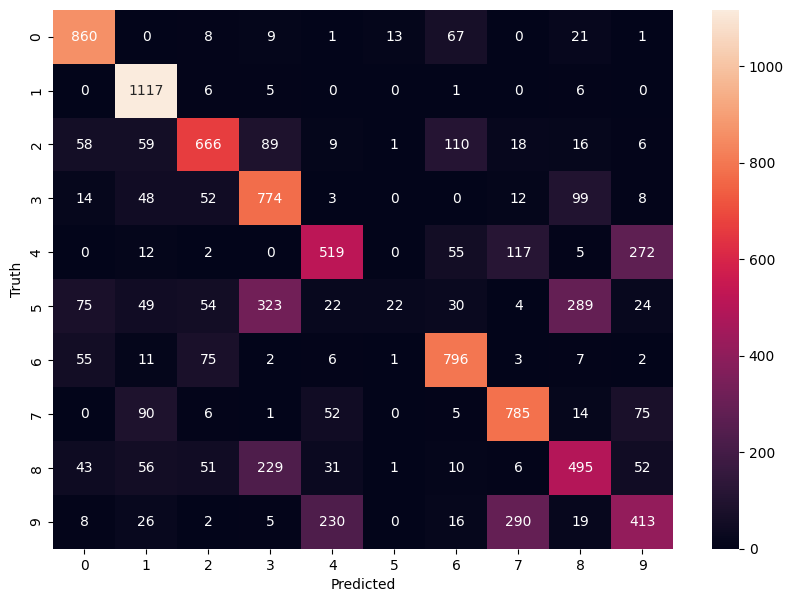

In [51]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [19]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, input_shape=(28, 28), activation='relu'))
model.add(keras.layers.Dense(10, activation='sigmoid'))
tensor_board =tf.keras.callbacks.TensorBoard(log_dir=r'logs2', histogram_freq=1)
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2,callbacks=[tensor_board])

Epoch 1/2


C:\Users\BS462NK\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5756 - loss: 1.3997
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8834 - loss: 0.4333


In [16]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9119 - loss: 0.3149


[0.280976802110672, 0.921999990940094]

In [22]:
model = keras.Sequential()

# Flatten layer
model.add(keras.layers.Flatten())

# First Dense layer with Batch Normalization
model.add(keras.layers.Dense(10, input_shape=(28, 28),activation='relu'))
model.add(keras.layers.BatchNormalization())

# Second Dense layer with Batch Normalization
model.add(keras.layers.Dense(10, activation='sigmoid'))
model.add(keras.layers.BatchNormalization())

# TensorBoard callback
tensor_board = tf.keras.callbacks.TensorBoard(
    log_dir=r'logs3',
    histogram_freq=1
)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
model.fit(X_train, y_train, epochs=2,callbacks=[tensor_board])

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5548 - loss: 2.4569
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6885 - loss: 1.4074
